**Regression Analysis For Car Sales Data**

**Import Necessary Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving car_sales_data.csv to car_sales_data.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['car_sales_data.csv']))

In [ ]:
# Check NAN Values

In [ ]:
df.isnull().sum()

Date                 0
Salesperson          0
Customer Name        0
Car Make             0
Car Model            0
Car Year             0
Sale Price           0
Commission Rate      0
Commission Earned    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Date               1048575 non-null  object 
 1   Salesperson        1048575 non-null  object 
 2   Customer Name      1048575 non-null  object 
 3   Car Make           1048575 non-null  object 
 4   Car Model          1048575 non-null  object 
 5   Car Year           1048575 non-null  int64  
 6   Sale Price         1048575 non-null  int64  
 7   Commission Rate    1048575 non-null  float64
 8   Commission Earned  1048575 non-null  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 72.0+ MB


In [ ]:
df.describe()

,Car Year,Sale Price,Commission Rate,Commission Earned
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.015995e+03,3.001837e+04,9.995861e-02,3.000824e+03
std,3.740360e+00,1.154381e+04,2.886096e-02,1.480912e+03
min,2.010000e+03,1.000000e+04,5.000014e-02,5.013400e+02
25%,2.013000e+03,2.003000e+04,7.493990e-02,1.822280e+03
50%,2.016000e+03,3.000900e+04,9.996744e-02,2.741750e+03
75%,2.019000e+03,4.003200e+04,1.249475e-01,3.978925e+03
max,2.022000e+03,5.000000e+04,1.500000e-01,7.494530e+03


**Calculate the average sale price for each car make**

In [ ]:
avg_sale_price = df.groupby('Car Make')['Sale Price'].mean()

Define a higher price of car make as the car make with the highest average sale price
**bold text**

In [ ]:
higher_price_make = avg_sale_price.idxmax()

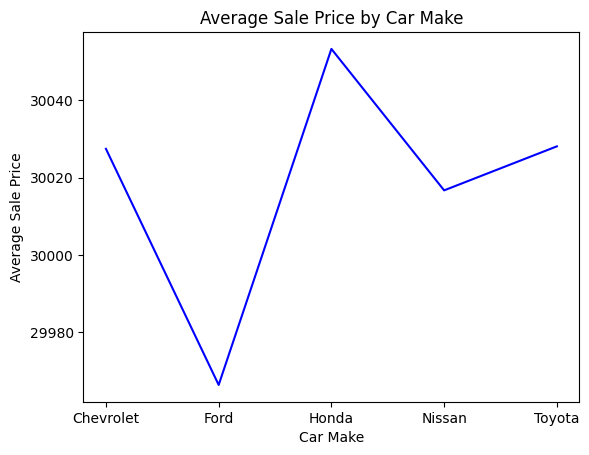

In [ ]:
# Visualize the results 
plt.plot(avg_sale_price, 'b-', label='Average Sale Price')
plt.xlabel('Car Make')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price by Car Make')
plt.show()

In [ ]:
print(f'The higher price of car make is {higher_price_make}')

The higher price of car make is Honda


**Calculate the commission earned for each customer name**

In [ ]:

commission_earned = df.groupby('Customer Name')['Commission Earned'].sum()

**Define the best five commission earned as the top five customer names with the highest commission earned**

In [ ]:
best_five_commission_earned = commission_earned.nlargest(5)

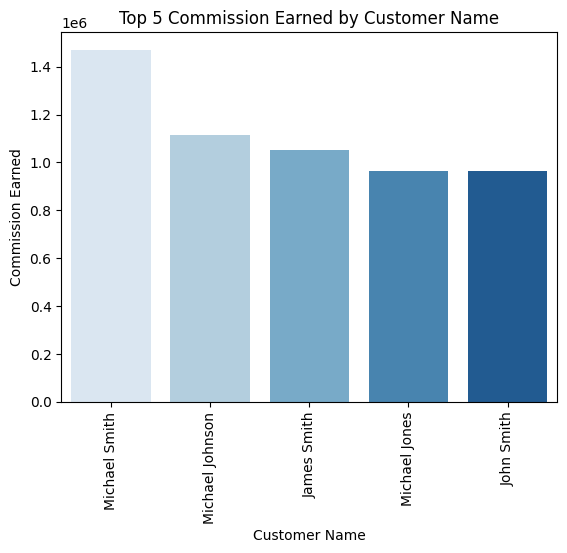

In [ ]:
# Visualize the results
sns.barplot(x=best_five_commission_earned.index, y=best_five_commission_earned.values, palette='Blues')
plt.xlabel('Customer Name')
plt.ylabel('Commission Earned')
plt.title('Top 5 Commission Earned by Customer Name')
plt.xticks(rotation=90)
plt.show()

In [ ]:
print(f'The best five commission earned are {best_five_commission_earned}')

The best five commission earned are Customer Name
Michael Smith      1471043.86
Michael Johnson    1113566.21
James Smith        1050118.43
Michael Jones       964482.04
John Smith          964031.85
Name: Commission Earned, dtype: float64


**Convert the Date column to a Pandas DatetimeIndex object**

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

**Extract the month from the Date column and convert it to a string**

In [ ]:

df['Month'] = df['Date'].dt.month.astype(str)
df.head()

,Date,Salesperson,Customer Name,Car Make,Car Model,Car Year,Sale Price,Commission Rate,Commission Earned,Month
0,2022-08-01,Monica Moore MD,Mary Butler,Nissan,Altima,2018,15983,0.070495,1126.73,8
1,2023-03-15,Roberto Rose,Richard Pierce,Nissan,F-150,2016,38474,0.134439,5172.40,3
2,2023-04-29,Ashley Ramos,Sandra Moore,Ford,Civic,2016,33340,0.114536,3818.63,4
3,2022-09-04,Patrick Harris,Johnny Scott,Ford,Altima,2013,41937,0.092191,3866.20,9
4,2022-06-16,Eric Lopez,Vanessa Jones,Honda,Silverado,2022,20256,0.113490,2298.85,6


**Group the DataFrame by month and calculate the average sale price   **

In [ ]:
df = df.groupby('Month').agg({'Sale Price': 'mean'})

In [ ]:
df = df.sort_values('Sale Price', ascending=False)

best_months = df.head(5)
print(best_months)

         Sale Price
Month              
8      30114.552856
4      30059.314335
11     30054.150646
2      30029.932380
7      30027.307681


**Now We Want To Make a prediction for this data so we have over more 1048000 rows that lead us to build a regression of deep learning model using Relu Function and Mini_Batch to divide dataset **

In [63]:
uploaded = files.upload()

Saving car_sales_data.csv to car_sales_data.csv


In [55]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
df = pd.read_csv('/content/drive/My Drive/car_sales_data.csv')

**Upload File and Import necessary Library**

In [95]:
uploaded = files.upload()

Saving car_sales_data.csv to car_sales_data (1).csv


In [109]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import io
dataset = pd.read_csv(io.BytesIO(uploaded['car_sales_data.csv']))

**Load and preprocess the data**

In [110]:
dataset = pd.read_csv('car_sales_data.csv') # Replace 'your_dataset.csv' with your actual dataset file
selected_columns = ['Sale Price', 'Commission Earned']  # Specify the columns you want to use
dataset = dataset[selected_columns].dropna()

**Split the dataset into train and test sets**

In [111]:
train_dataset = dataset.sample(frac=0.8, random_state=42)
test_dataset = dataset.drop(train_dataset.index)

**Define the features and labels**

In [112]:
features = train_dataset.drop('Commission Earned', axis=1)
labels = train_dataset['Commission Earned']

In [113]:
features = features.astype(float)

**Build the neural network model**

In [114]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(1, activation='linear')
])

**Compile the model**

In [115]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

**Train the model**

In [116]:
model.fit(features, labels, epochs=10)

Epoch 1/10
26215/26215 [==============================] - 62s 2ms/step - loss: 871199.2500 - mae: 753.2317
Epoch 2/10
26215/26215 [==============================] - 55s 2ms/step - loss: 866191.9375 - mae: 751.7922
Epoch 3/10
26215/26215 [==============================] - 56s 2ms/step - loss: 864956.3750 - mae: 751.3786
Epoch 4/10
26215/26215 [==============================] - 56s 2ms/step - loss: 864606.6875 - mae: 751.3354
Epoch 5/10
26215/26215 [==============================] - 56s 2ms/step - loss: 864572.3125 - mae: 751.3142
Epoch 6/10
26215/26215 [==============================] - 56s 2ms/step - loss: 864551.4375 - mae: 751.2648
Epoch 7/10
26215/26215 [==============================] - 56s 2ms/step - loss: 864476.5000 - mae: 751.2566
Epoch 8/10
26215/26215 [==============================] - 56s 2ms/step - loss: 864381.8125 - mae: 751.3098
Epoch 9/10
26215/26215 [==============================] - 55s 2ms/step - loss: 864217.3125 - mae: 751.2745
Epoch 10/10
26215/26215 [============

**Evaluate the model**

In [117]:
model.evaluate(features, labels)

26215/26215 [==============================] - 42s 2ms/step - loss: 872979.8750 - mae: 753.7247


[872979.875, 753.7247314453125]

**Convert the test data to a NumPy array**

In [120]:
test_dataset = test_dataset.to_numpy()

**Reshape the test data**

In [122]:
test_dataset = test_dataset.reshape(-1, 1)

**Make predictions**

In [123]:
predictions = model.predict(test_dataset)

13108/13108 [==============================] - 19s 1ms/step


In [124]:
print(predictions)

[[4048.2114 ]
 [ 373.7903 ]
 [1426.0791 ]
 ...
 [ 362.81558]
 [2312.9597 ]
 [ 156.88246]]


Ploting The Result

In [125]:
import matplotlib.pyplot as plt

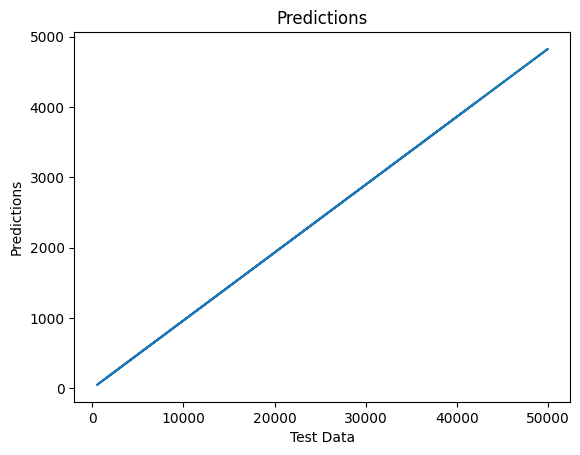

In [126]:
plt.plot(test_dataset, predictions)
plt.xlabel('Test Data')
plt.ylabel('Predictions')
plt.title('Predictions')
plt.show()